In [1]:
import numpy as np

Loaded full_gs_energy.npy, shape=(2800,), dtype=float64


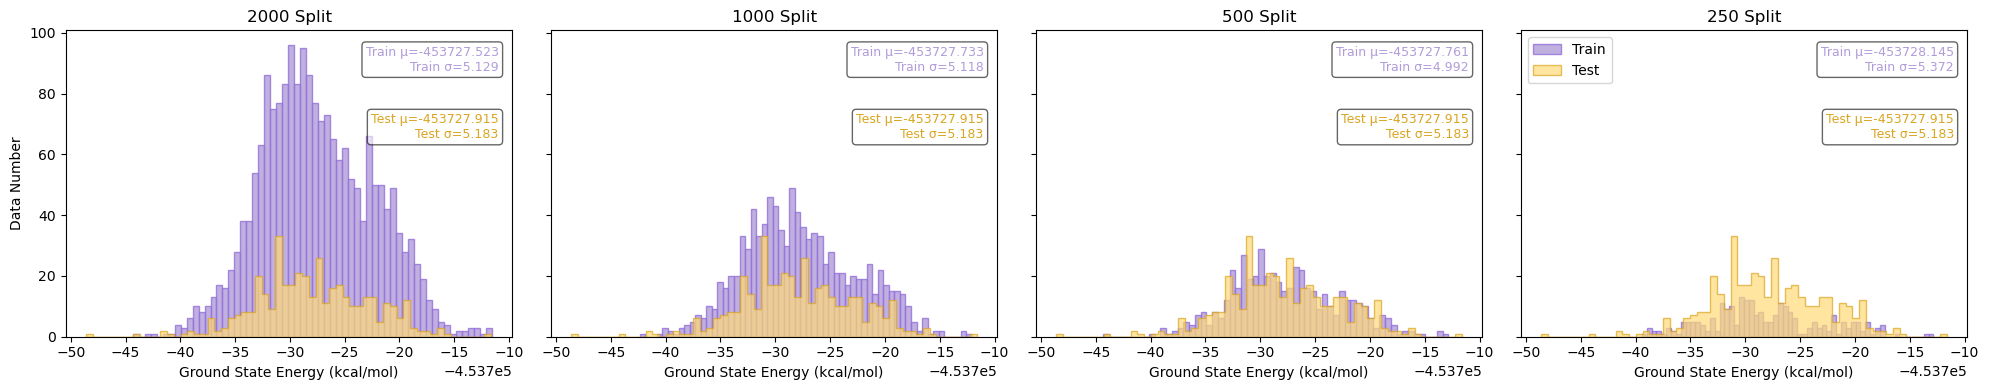

✅ Saved combined comparison plot: /scratch/moriya/md/phbdi_tddft/plots/full_gs_energy_multi_split_pastel.png


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
from chemlab.util.unit import ENERGY
import numpy as np
import matplotlib.pyplot as plt
import os
from chemlab.util.unit import ENERGY

def plot_multi_split_energy_distribution(
    data_dir,
    filename="full_ex_energy.npy",
    split_prefixes=("2000", "1000", "500", "250"),
    xlabel="S0→S1 Excitation Energy (kcal/mol)",
    train_color="#b19cd9",
    test_color="#ffda77",
    save_name="multi_split_pastel.png",
    energy_convert=("kcal/mol","kcal/mol")
):
    """
    Plot multi-panel histograms comparing train/test distributions for multiple splits,
    and show mean/std in each subplot with color-coded labels.
    """
    # --- Directory setup ---
    plot_dir = os.path.join(data_dir, "plots")
    os.makedirs(plot_dir, exist_ok=True)

    # --- Load data ---
    path = os.path.join(data_dir, filename)
    arr = np.load(path)
    arr = ENERGY(arr, energy_convert[0]).convert_to(energy_convert[1])
    print(f"Loaded {filename}, shape={arr.shape}, dtype={arr.dtype}")

    # --- Prepare figure ---
    ncols = len(split_prefixes)
    fig, axes = plt.subplots(1, ncols, figsize=(5 * ncols, 4), sharey=True)

    for i, prefix in enumerate(split_prefixes):
        split_file = os.path.join(data_dir, f"{prefix}_split.npz")
        if not os.path.exists(split_file):
            print(f"⚠️ Skip missing file: {split_file}")
            continue

        split = np.load(split_file)
        idx_train = split["idx_train"]
        idx_test = split["idx_test"]

        data_train = arr[idx_train]
        data_test = arr[idx_test]

        if data_train.ndim > 1:
            data_train = data_train.flatten()
            data_test = data_test.flatten()

        # --- compute statistics ---
        mean_train, std_train = np.mean(data_train), np.std(data_train)
        mean_test, std_test = np.mean(data_test), np.std(data_test)

        # --- plotting ---
        ax = axes[i] if ncols > 1 else axes
        ax.hist(data_train, bins=60, alpha=0.8, label="Train",
                color=train_color, edgecolor="mediumpurple", density=False)
        ax.hist(data_test, bins=60, alpha=0.7, label="Test",
                color=test_color, edgecolor="goldenrod", density=False, histtype='stepfilled')

        ax.set_xlabel(xlabel, fontsize=10)
        ax.set_title(f"{prefix} Split", fontsize=12)
        if i == 0:
            ax.set_ylabel("Data Number", fontsize=10)
        if i == len(split_prefixes) - 1:
            ax.legend()

        # --- annotation box with color-coded lines ---
        text_train = f"Train μ={mean_train:.3f}\nTrain σ={std_train:.3f}"
        text_test = f"Test μ={mean_test:.3f}\nTest σ={std_test:.3f}"

        ax.text(
            0.97, 0.95, text_train,
            transform=ax.transAxes,
            fontsize=9,
            color=train_color,
            verticalalignment="top",
            horizontalalignment="right",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6)
        )

        ax.text(
            0.97, 0.73, text_test,  # 稍微往下放一点，避免重叠
            transform=ax.transAxes,
            fontsize=9,
            color="goldenrod",  # 用与边框一致的深色以便可读
            verticalalignment="top",
            horizontalalignment="right",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6)
        )

    plt.tight_layout()
    outfile = os.path.join(plot_dir, filename.replace(".npy", f"_{save_name}"))
    plt.savefig(outfile, dpi=150)
    plt.show()
    print(f"✅ Saved combined comparison plot: {outfile}")


plot_multi_split_energy_distribution(
    data_dir="/scratch/moriya/md/phbdi_tddft",
    filename="full_gs_energy.npy",
    split_prefixes=["2000", "1000", "500", "250"],
    xlabel="Ground State Energy (kcal/mol)",
    energy_convert=["kcal/mol","kcal/mol"]
)


In [1]:
from chemlab.util.ml_data import MLData

In [2]:
files = ["full_coord", "full_ex_energy", "full_force", "full_qm_type"]
test = MLData("/scratch/moriya/md/phbdi_tddft/",files=["full_coord", "full_ex_energy", "full_force", "full_qm_type"],energy_key="full_ex_energy",type="npy")

Loaded dataset with 2800 frames, ? atoms


In [3]:
test.save_multiple_splits_same_test(
    train_sizes=[2000, 1000, 500, 250],
    n_val=200,
    n_test=400,
    prefix="/scratch/moriya/md/phbdi_tddft/",
    seed=42
)

Fixed test set selected: 400 samples.
✅ Saved /scratch/moriya/md/phbdi_tddft/2000_split.npz (train=2000, val=200, test=400)
✅ Saved /scratch/moriya/md/phbdi_tddft/1000_split.npz (train=1000, val=200, test=400)
✅ Saved /scratch/moriya/md/phbdi_tddft/500_split.npz (train=500, val=200, test=400)
✅ Saved /scratch/moriya/md/phbdi_tddft/250_split.npz (train=250, val=200, test=400)


In [13]:
import numpy as np
a_2000 = np.load("/scratch/moriya/md/phbdi_tddft/2000_split.npz")
a_1000 = np.load("/scratch/moriya/md/phbdi_tddft/1000_split.npz")
a_500 = np.load("/scratch/moriya/md/phbdi_tddft/500_split.npz")
a_250 = np.load("/scratch/moriya/md/phbdi_tddft/250_split.npz")

In [20]:
for i in a_250["idx_train"]:
    if i in a_2000["idx_test"]:
        print(i)